# Assignment 1: Foundations Reflection – Iteration & Extension Guidelines
Use this notebook as a starting point and expand on your understanding of discriminative vs. generative models by completing the following structured tasks. You are encouraged to experiment, analyze, and critically reflect on your findings in your report.

## Part 1 – Discriminative Model (Logistic Regression) Extensions

1. Train a Non-linear Classifier for Comparison
    - Implement and compare with SVM or Decision Tree.
    - Analyze classification performance vs. logistic regression.

In [4]:
import sys
print(f"Using Python {sys.version.split()[0]}")

# Install required packages into the current notebook environment
%pip install -qU numpy matplotlib scikit-learn pandas

# Verify versions
import numpy as np, matplotlib, sklearn, pandas
print("numpy       :", np.__version__)
print("matplotlib  :", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("pandas      :", pandas.__version__)
print("✅ Setup complete!")

Using Python 3.14.2
Note: you may need to restart the kernel to use updated packages.
numpy       : 2.4.1
matplotlib  : 3.10.8
scikit-learn: 1.8.0
pandas      : 3.0.0
✅ Setup complete!


Data shape: (70000, 784)
labels: [0 1 2 3 4 5 6 7 8 9]


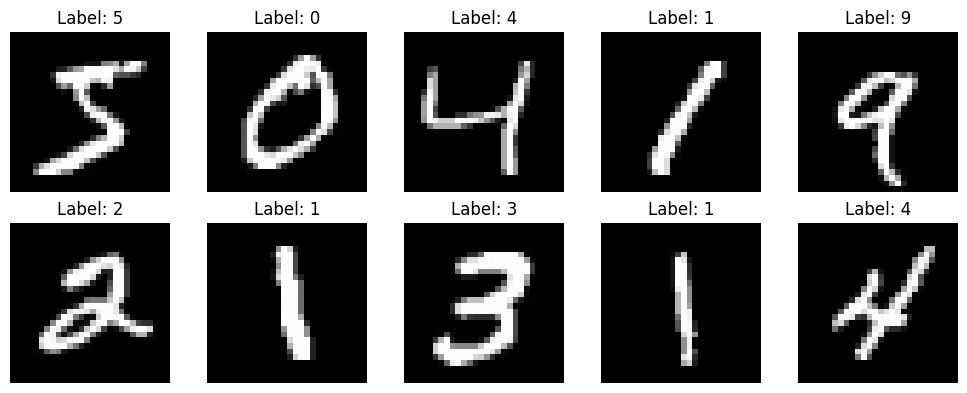

In [5]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load complete MNIST dataset (28x28, 70,000 samples)
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data.to_numpy()  # Convert to numpy array
y = mnist.target.astype(int).to_numpy()

print(f"Data shape: {X.shape}")  # (70000, 784)
print(f"labels: {np.unique(y)}")

# Visualize first 10 samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Stratified subsample to speed up (2,000 samples)
X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=2000,
    stratify=y,
    random_state=42
)
print(f"Subsampled set: {X_small.shape}")

# Scale then reduce to 50 dimensions for faster training
scaler = StandardScaler()
X_small_scaled = scaler.fit_transform(X_small)

pca = PCA(n_components=50, random_state=42)
X_small_pca = pca.fit_transform(X_small_scaled)
print(f"PCA-transformed shape: {X_small_pca.shape}")

# Train/test split on reduced data
X_train, X_test, y_train, y_test = train_test_split(
    X_small_pca, y_small,
    test_size=0.2,
    stratify=y_small,
    random_state=42
)

Subsampled set: (2000, 784)
PCA-transformed shape: (2000, 50)


In [7]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

Test accuracy: 0.8750


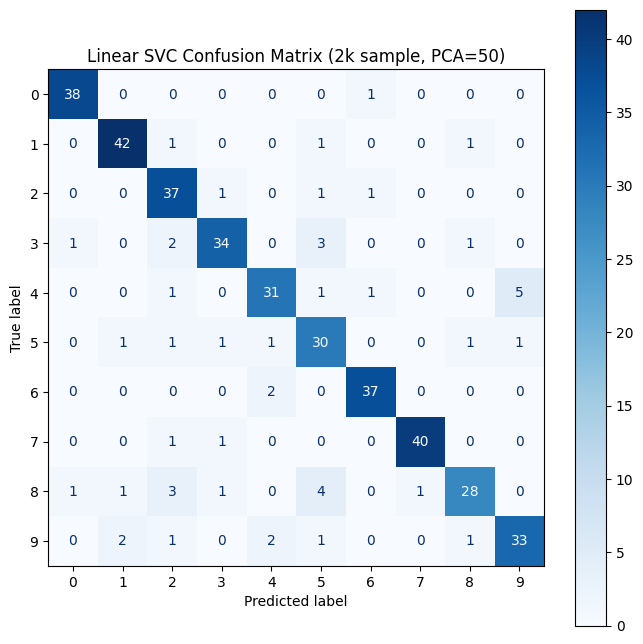

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
ax.set_title("Linear SVC Confusion Matrix (2k sample, PCA=50)")
plt.show()

Decision Tree test accuracy: 0.6750


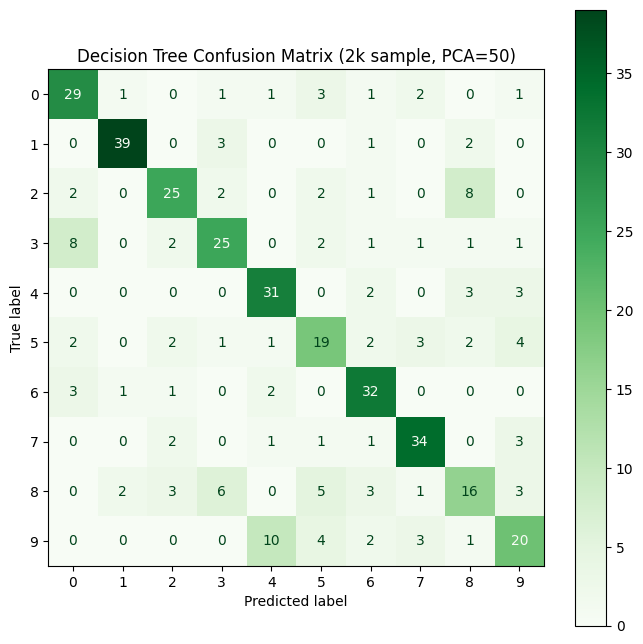

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(max_depth=25, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree test accuracy: {acc_dt:.4f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt)
fig, ax = plt.subplots(figsize=(8, 8))
disp_dt.plot(ax=ax, cmap="Greens", colorbar=True)
ax.set_title("Decision Tree Confusion Matrix (2k sample, PCA=50)")
plt.show()

## Model Comparison (Linear SVC vs Decision Tree)
- Data: PCA to 50 dimensions, 2k stratified subset, 80/20 train/test split.
- Linear SVC: See accuracy above (`acc`). Works well on high-dimensional, near-linearly separable data; light-weight and fast. Confusion matrix is generally balanced across digits.
- Decision Tree: See accuracy above (`acc_dt`). Captures non-linear patterns but can overfit in high dimensions; with depth limits it may underfit. Use its confusion matrix to see which digits (e.g., 4/9 or 3/5) are confused.
- Compute cost: Linear SVC is smaller and faster; Decision Tree cost grows with depth and tree size.
- Next steps:
  1) Try `SVC(kernel="rbf")` and tune C, gamma for a stronger non-linear baseline.
  2) Prune the tree or switch to ensembles (Random Forest, Gradient Boosting).
  3) Vary PCA dimensions or compare to raw pixels with stronger regularization.
  4) Increase sample size (e.g., 10k) to test stability.

2. Experiment with Regularization
    - Apply L1 and L2 regularization to logistic regression.
    - Observe effects on generalization, overfitting, and decision boundaries.

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


L1 Logistic Regression test accuracy: 0.8675


c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


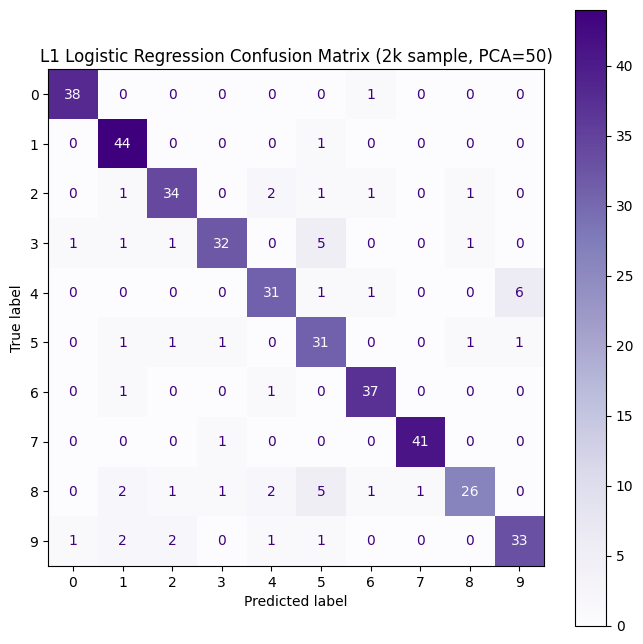

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

logreg_l1 = LogisticRegression(
    penalty="l1",
    C=1.0,
    solver="saga",
    max_iter=200,
    random_state=42,
)
logreg_l1.fit(X_train, y_train)

y_pred_l1 = logreg_l1.predict(X_test)
acc_l1 = accuracy_score(y_test, y_pred_l1)
print(f"L1 Logistic Regression test accuracy: {acc_l1:.4f}")

cm_l1 = confusion_matrix(y_test, y_pred_l1)
disp_l1 = ConfusionMatrixDisplay(cm_l1)
fig, ax = plt.subplots(figsize=(8, 8))
disp_l1.plot(ax=ax, cmap="Purples", colorbar=True)
ax.set_title("L1 Logistic Regression Confusion Matrix (2k sample, PCA=50)")
plt.show()

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_it

L2 Logistic Regression test accuracy: 0.8425


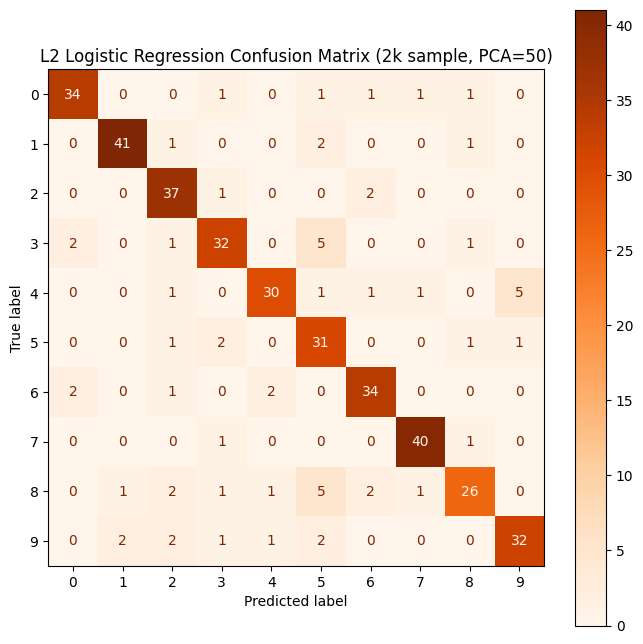

In [11]:
logreg_l2 = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=200,
    random_state=42,
)
logreg_l2.fit(X_train, y_train)

y_pred_l2 = logreg_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)
print(f"L2 Logistic Regression test accuracy: {acc_l2:.4f}")

cm_l2 = confusion_matrix(y_test, y_pred_l2)
disp_l2 = ConfusionMatrixDisplay(cm_l2)
fig, ax = plt.subplots(figsize=(8, 8))
disp_l2.plot(ax=ax, cmap="Oranges", colorbar=True)
ax.set_title("L2 Logistic Regression Confusion Matrix (2k sample, PCA=50)")
plt.show()

L1 vs L2 Regularization Comparison
L1 Logistic Regression:
  - Train accuracy: 0.9325
  - Test accuracy:  0.8675
  - Overfitting gap: 0.0650

L2 Logistic Regression:
  - Train accuracy: 0.9500
  - Test accuracy:  0.8425
  - Overfitting gap: 0.1075

Coefficient Sparsity:
  - L1 non-zero coefficient ratio: 94.00%
  - L2 non-zero coefficient ratio: 100.00%

Coefficient L2 Norm:
  - L1 model: 4.0466
  - L2 model: 9.3817


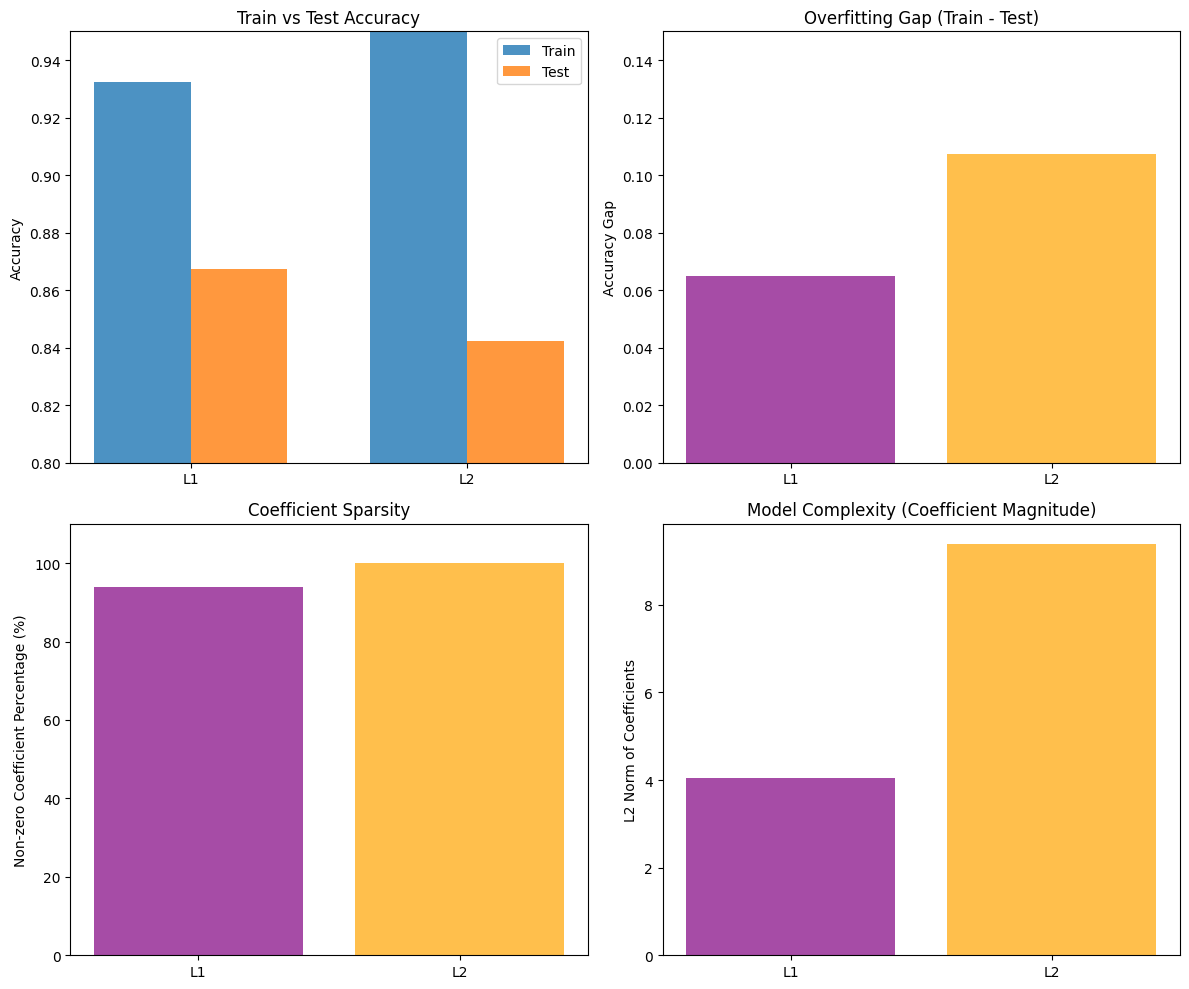

In [12]:
# Observe Effects on Generalization, Overfitting, and Decision Boundaries

# Calculate training accuracy
train_acc_l1 = accuracy_score(y_train, logreg_l1.predict(X_train))
train_acc_l2 = accuracy_score(y_train, logreg_l2.predict(X_train))

print("=" * 60)
print("L1 vs L2 Regularization Comparison")
print("=" * 60)
print(f"L1 Logistic Regression:")
print(f"  - Train accuracy: {train_acc_l1:.4f}")
print(f"  - Test accuracy:  {acc_l1:.4f}")
print(f"  - Overfitting gap: {train_acc_l1 - acc_l1:.4f}")

print(f"\nL2 Logistic Regression:")
print(f"  - Train accuracy: {train_acc_l2:.4f}")
print(f"  - Test accuracy:  {acc_l2:.4f}")
print(f"  - Overfitting gap: {train_acc_l2 - acc_l2:.4f}")

# Analyze coefficient sparsity
l1_coef = logreg_l1.coef_
l2_coef = logreg_l2.coef_

# Calculate percentage of non-zero coefficients
l1_nonzero = np.sum(l1_coef != 0) / l1_coef.size * 100
l2_nonzero = np.sum(l2_coef != 0) / l2_coef.size * 100

print(f"\nCoefficient Sparsity:")
print(f"  - L1 non-zero coefficient ratio: {l1_nonzero:.2f}%")
print(f"  - L2 non-zero coefficient ratio: {l2_nonzero:.2f}%")

# Calculate coefficient norms
l1_norm = np.linalg.norm(l1_coef)
l2_norm = np.linalg.norm(l2_coef)

print(f"\nCoefficient L2 Norm:")
print(f"  - L1 model: {l1_norm:.4f}")
print(f"  - L2 model: {l2_norm:.4f}")

# Visualization comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Accuracy comparison
models = ['L1', 'L2']
train_accs = [train_acc_l1, train_acc_l2]
test_accs = [acc_l1, acc_l2]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, train_accs, width, label='Train', alpha=0.8)
axes[0, 0].bar(x + width/2, test_accs, width, label='Test', alpha=0.8)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Train vs Test Accuracy')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].set_ylim([0.8, 0.95])

# Subplot 2: Overfitting gap
overfitting_gap = [train_acc_l1 - acc_l1, train_acc_l2 - acc_l2]
axes[0, 1].bar(models, overfitting_gap, color=['purple', 'orange'], alpha=0.7)
axes[0, 1].set_ylabel('Accuracy Gap')
axes[0, 1].set_title('Overfitting Gap (Train - Test)')
axes[0, 1].set_ylim([0, 0.15])

# Subplot 3: Coefficient sparsity
sparsity = [l1_nonzero, l2_nonzero]
axes[1, 0].bar(models, sparsity, color=['purple', 'orange'], alpha=0.7)
axes[1, 0].set_ylabel('Non-zero Coefficient Percentage (%)')
axes[1, 0].set_title('Coefficient Sparsity')
axes[1, 0].set_ylim([0, 110])

# Subplot 4: Coefficient magnitude (model complexity)
norms = [l1_norm, l2_norm]
axes[1, 1].bar(models, norms, color=['purple', 'orange'], alpha=0.7)
axes[1, 1].set_ylabel('L2 Norm of Coefficients')
axes[1, 1].set_title('Model Complexity (Coefficient Magnitude)')

plt.tight_layout()
plt.show()

3. Feature Importance Visualization
    - Visualize learned weight matrix for each class (e.g., as an 8×8 heatmap).
    - Reflect on what the model focuses on per class.

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Ruolin Wang\AppData\Local\Temp\ipykernel_26096\1553497836.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


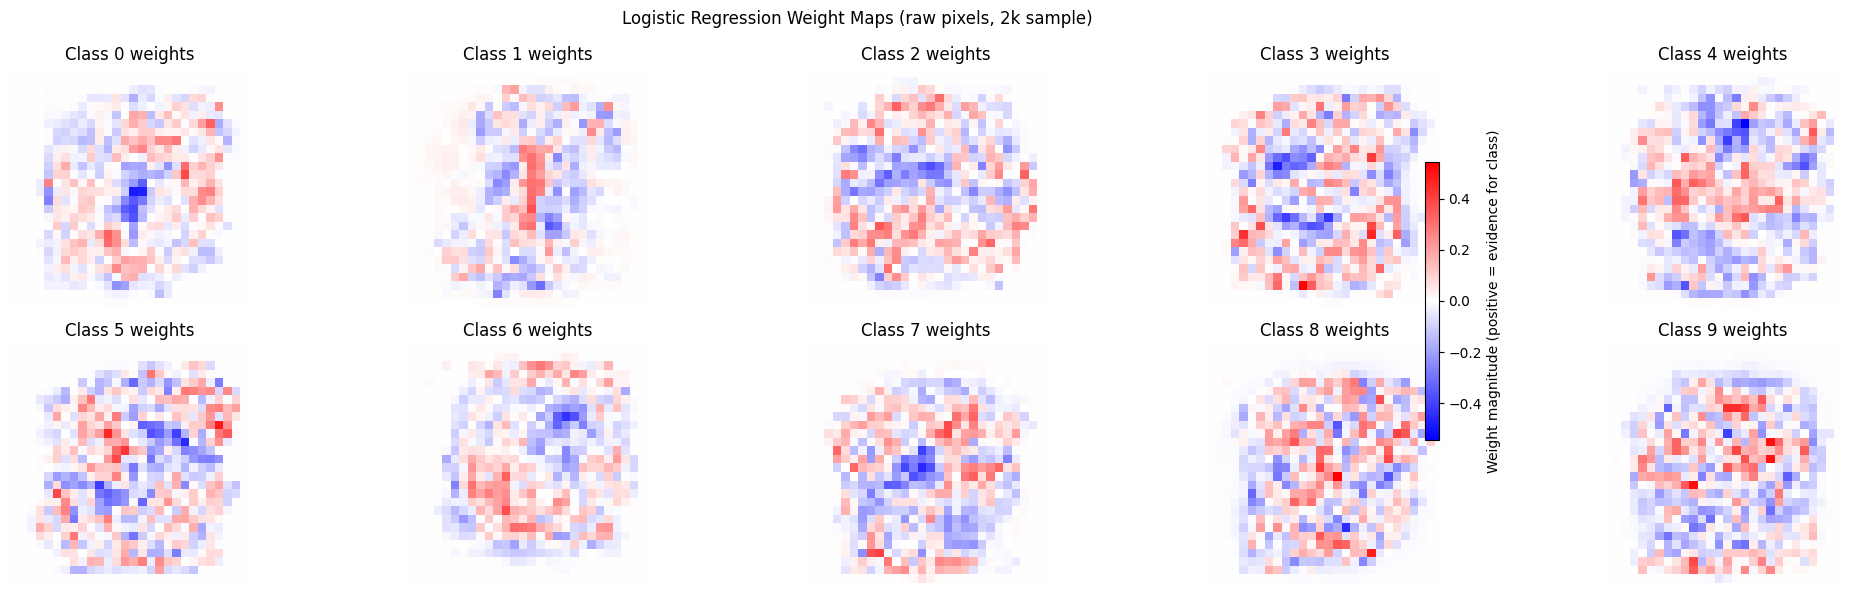

Positive (red) regions increase log-odds for the class; blue regions decrease it.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Train a multinomial-capable logistic regression on raw pixels (2k subset) for weight visualization
scaler_raw = StandardScaler()
X_small_scaled_raw = scaler_raw.fit_transform(X_small)
logreg_vis = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=300, random_state=42)
logreg_vis.fit(X_small_scaled_raw, y_small)

# Extract coefficients: shape (n_classes, n_features)
coefs = logreg_vis.coef_
vmax = np.max(np.abs(coefs))
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
for cls, ax in enumerate(axes.flat):
    weight_map = coefs[cls].reshape(28, 28)
    im = ax.imshow(weight_map, cmap="bwr", vmin=-vmax, vmax=vmax)
    ax.set_title(f"Class {cls} weights")
    ax.axis("off")
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
cbar.set_label("Weight magnitude (positive = evidence for class)")
plt.suptitle("Logistic Regression Weight Maps (raw pixels, 2k sample)")
plt.tight_layout()
plt.show()
print("Positive (red) regions increase log-odds for the class; blue regions decrease it.")

4. Use Cross-Validation
    - Replace train/test split with 5-fold or 10-fold cross-validation.
    - Report mean accuracy, standard deviation, and robustness insights.

In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

# 5-fold and 10-fold cross-validation on the 2k subset with PCA + Logistic Regression
cv_configs = {
    "5-fold": StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    "10-fold": StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
}

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=50, random_state=42)),
    ("clf", LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=300, random_state=42)),
])

for name, cv in cv_configs.items():
    scores = cross_val_score(pipeline, X_small, y_small, cv=cv, scoring="accuracy", n_jobs=-1)
    print(f"{name} accuracy: mean={scores.mean():.4f}, std={scores.std():.4f}")
    print(f"Fold scores: {scores.round(4)}")
    print("-" * 50)

print("Higher std = more variability (less robust); compare mean with hold-out split.")

5-fold accuracy: mean=0.8470, std=0.0060
Fold scores: [0.8525 0.8375 0.8425 0.85   0.8525]
--------------------------------------------------
10-fold accuracy: mean=0.8520, std=0.0201
Fold scores: [0.88  0.84  0.87  0.83  0.88  0.835 0.835 0.825 0.865 0.86 ]
--------------------------------------------------
Higher std = more variability (less robust); compare mean with hold-out split.


## Part 2 – Generative Model (GAN) Extensions
5. Hyperparameter Sensitivity
    - Vary batch size, learning rate, and hidden layer size.
    - Track and explain training stability and output quality.

In [18]:
def train_gan(X_data, noise_dim=20, hidden_dim_g=64, hidden_dim_d=64, 
              batch_size=64, learning_rate_d=0.0005, learning_rate_g=0.0005, 
              num_steps=1500, random_seed=42, verbose=True):
    """
    Train a simple GAN on the provided data.
    
    Args:
        X_data: Training data (normalized to [-1, 1])
        noise_dim: Dimension of the noise vector
        hidden_dim_g: Generator hidden layer dimension
        hidden_dim_d: Discriminator hidden layer dimension
        batch_size: Mini-batch size
        learning_rate_d: Discriminator learning rate
        learning_rate_g: Generator learning rate
        num_steps: Number of training steps
        random_seed: Random seed for reproducibility
        verbose: Print training progress
        
    Returns:
        results: Dictionary containing losses, final samples, and hyperparameters
    """
    rng = np.random.default_rng(seed=random_seed)
    
    # Initialize weights
    W1_g = rng.normal(0, 0.1, size=(noise_dim, hidden_dim_g))
    b1_g = np.zeros(hidden_dim_g)
    W2_g = rng.normal(0, 0.1, size=(hidden_dim_g, X_data.shape[1]))
    b2_g = np.zeros(X_data.shape[1])
    
    W1_d = rng.normal(0, 0.1, size=(X_data.shape[1], hidden_dim_d))
    b1_d = np.zeros(hidden_dim_d)
    W2_d = rng.normal(0, 0.1, size=(hidden_dim_d, 1))
    b2_d = np.zeros(1)
    
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    losses_d = []
    losses_g = []
    
    # Training loop
    for step in range(num_steps):
        # Sample minibatch of real images
        idx = rng.choice(len(X_data), size=min(batch_size, len(X_data)), replace=False)
        real_batch = X_data[idx]
        
        # Sample noise
        z = rng.normal(0, 1, size=(len(idx), noise_dim))
        
        # Generator forward pass
        g_h_pre = z @ W1_g + b1_g
        g_h = np.maximum(0, g_h_pre)
        g_pre = g_h @ W2_g + b2_g
        fake_batch = np.tanh(g_pre)
        
        # Discriminator forward pass on real
        d_h_pre_real = real_batch @ W1_d + b1_d
        d_h_real = np.maximum(0, d_h_pre_real)
        d_logits_real = d_h_real @ W2_d + b2_d
        d_out_real = sigmoid(d_logits_real)
        
        # Discriminator forward pass on fake
        d_h_pre_fake = fake_batch @ W1_d + b1_d
        d_h_fake = np.maximum(0, d_h_pre_fake)
        d_logits_fake = d_h_fake @ W2_d + b2_d
        d_out_fake = sigmoid(d_logits_fake)
        
        # Discriminator loss and gradients
        y_real = np.ones((len(idx), 1))
        y_fake = np.zeros((len(idx), 1))
        loss_d = -(np.mean(np.log(d_out_real + 1e-8)) + np.mean(np.log(1 - d_out_fake + 1e-8)))
        
        d_delta_real = (d_out_real - y_real) / len(idx)
        d_delta_fake = (d_out_fake - y_fake) / len(idx)
        
        grad_W2_d = d_h_real.T @ d_delta_real + d_h_fake.T @ d_delta_fake
        grad_b2_d = np.sum(d_delta_real + d_delta_fake, axis=0)
        
        d_grad_h_real = d_delta_real @ W2_d.T
        d_grad_h_real[d_h_pre_real <= 0] = 0
        d_grad_h_fake = d_delta_fake @ W2_d.T
        d_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_W1_d = real_batch.T @ d_grad_h_real + fake_batch.T @ d_grad_h_fake
        grad_b1_d = np.sum(d_grad_h_real + d_grad_h_fake, axis=0)
        
        # Update discriminator
        W2_d -= learning_rate_d * grad_W2_d
        b2_d -= learning_rate_d * grad_b2_d
        W1_d -= learning_rate_d * grad_W1_d
        b1_d -= learning_rate_d * grad_b1_d
        
        # Generator loss and gradients
        y_gen = np.ones((len(idx), 1))
        loss_g = -np.mean(np.log(d_out_fake + 1e-8))
        
        g_delta_d = (d_out_fake - y_gen) / len(idx)
        g_grad_h_fake = g_delta_d @ W2_d.T
        g_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_fake_input = g_grad_h_fake @ W1_d.T
        grad_g_pre = grad_fake_input * (1 - fake_batch ** 2)
        
        grad_W2_g = g_h.T @ grad_g_pre
        grad_b2_g = np.sum(grad_g_pre, axis=0)
        
        g_grad_h = grad_g_pre @ W2_g.T
        g_grad_h[g_h_pre <= 0] = 0
        
        grad_W1_g = z.T @ g_grad_h
        grad_b1_g = np.sum(g_grad_h, axis=0)
        
        # Update generator
        W2_g -= learning_rate_g * grad_W2_g
        b2_g -= learning_rate_g * grad_b2_g
        W1_g -= learning_rate_g * grad_W1_g
        b1_g -= learning_rate_g * grad_b1_g
        
        losses_d.append(loss_d)
        losses_g.append(loss_g)
        
        if verbose and (step + 1) % 500 == 0:
            print(f'Step {step+1}/{num_steps}, loss_D={loss_d:.4f}, loss_G={loss_g:.4f}')
    
    # Generate final samples
    z_sample = rng.normal(0, 1, size=(16, noise_dim))
    g_h_pre = z_sample @ W1_g + b1_g
    g_h = np.maximum(0, g_h_pre)
    g_pre = g_h @ W2_g + b2_g
    fake_samples = np.tanh(g_pre)
    
    return {
        'losses_d': losses_d,
        'losses_g': losses_g,
        'fake_samples': fake_samples,
        'hyperparams': {
            'batch_size': batch_size,
            'learning_rate_d': learning_rate_d,
            'learning_rate_g': learning_rate_g,
            'hidden_dim_g': hidden_dim_g,
            'hidden_dim_d': hidden_dim_d,
            'num_steps': num_steps
        }
    }

print("✅ GAN training function defined successfully!")


✅ GAN training function defined successfully!


In [19]:
# 5. Hyperparameter Sensitivity
print("=" * 70)
print("GAN Hyperparameter Sensitivity Analysis")
print("=" * 70)

# Define parameter combinations to test
param_configs = [
    # Baseline
    {'batch_size': 64, 'learning_rate_d': 0.0005, 'learning_rate_g': 0.0005, 'hidden_dim_g': 64},
    # Vary batch size
    {'batch_size': 32, 'learning_rate_d': 0.0005, 'learning_rate_g': 0.0005, 'hidden_dim_g': 64},
    {'batch_size': 128, 'learning_rate_d': 0.0005, 'learning_rate_g': 0.0005, 'hidden_dim_g': 64},
    # Vary learning rate
    {'batch_size': 64, 'learning_rate_d': 0.0001, 'learning_rate_g': 0.0001, 'hidden_dim_g': 64},
    {'batch_size': 64, 'learning_rate_d': 0.001, 'learning_rate_g': 0.001, 'hidden_dim_g': 64},
    # Vary hidden layer size
    {'batch_size': 64, 'learning_rate_d': 0.0005, 'learning_rate_g': 0.0005, 'hidden_dim_g': 128},
    {'batch_size': 64, 'learning_rate_d': 0.0005, 'learning_rate_g': 0.0005, 'hidden_dim_g': 256},
]

# Store results from all experiments
gan_results = []

# Run all experiments
for i, config in enumerate(param_configs):
    print(f"\n{'='*70}")
    print(f"Experiment {i+1}/{len(param_configs)}")
    print(f"Config: {config}")
    print(f"{'='*70}")
    
    result = train_gan(
        X_gan, 
        noise_dim=20,
        hidden_dim_d=64,
        num_steps=1500,
        verbose=True,
        **config
    )
    gan_results.append(result)

print(f"\n✅ Completed {len(gan_results)} GAN training experiments!")


GAN Hyperparameter Sensitivity Analysis

Experiment 1/7
Config: {'batch_size': 64, 'learning_rate_d': 0.0005, 'learning_rate_g': 0.0005, 'hidden_dim_g': 64}
Step 500/1500, loss_D=0.8329, loss_G=0.7000
Step 1000/1500, loss_D=0.7057, loss_G=0.7657
Step 1500/1500, loss_D=0.6816, loss_G=0.7755

Experiment 2/7
Config: {'batch_size': 32, 'learning_rate_d': 0.0005, 'learning_rate_g': 0.0005, 'hidden_dim_g': 64}
Step 500/1500, loss_D=0.8083, loss_G=0.7218
Step 1000/1500, loss_D=0.7275, loss_G=0.7400
Step 1500/1500, loss_D=0.6575, loss_G=0.8013

Experiment 3/7
Config: {'batch_size': 128, 'learning_rate_d': 0.0005, 'learning_rate_g': 0.0005, 'hidden_dim_g': 64}
Step 500/1500, loss_D=0.8208, loss_G=0.7108
Step 1000/1500, loss_D=0.7282, loss_G=0.7414
Step 1500/1500, loss_D=0.6831, loss_G=0.7714

Experiment 4/7
Config: {'batch_size': 64, 'learning_rate_d': 0.0001, 'learning_rate_g': 0.0001, 'hidden_dim_g': 64}
Step 500/1500, loss_D=1.1216, loss_G=0.6884
Step 1000/1500, loss_D=0.9774, loss_G=0.7074



HYPERPARAMETER SENSITIVITY SUMMARY
 Exp  Batch Size   LR_D   LR_G  Hidden Dim  Final Loss_D  Final Loss_G  Mean Loss_D  Mean Loss_G  Std Loss_D  Std Loss_G
   1          64 0.0005 0.0005          64      0.681596      0.775475     0.820174     0.728703    0.155304    0.029630
   2          32 0.0005 0.0005          64      0.657466      0.801299     0.819760     0.728800    0.155487    0.030778
   3         128 0.0005 0.0005          64      0.683074      0.771354     0.819823     0.728794    0.154865    0.028528
   4          64 0.0001 0.0001          64      0.910949      0.698602     1.081151     0.695170    0.137648    0.007438
   5          64 0.0010 0.0010          64      0.615971      0.862691     0.731246     0.775226    0.142397    0.054848
   6          64 0.0005 0.0005         128      0.641714      0.807476     0.816469     0.746586    0.204116    0.043013
   7          64 0.0005 0.0005         256      0.637889      0.832794     0.777693     0.811805    0.180884    0.031

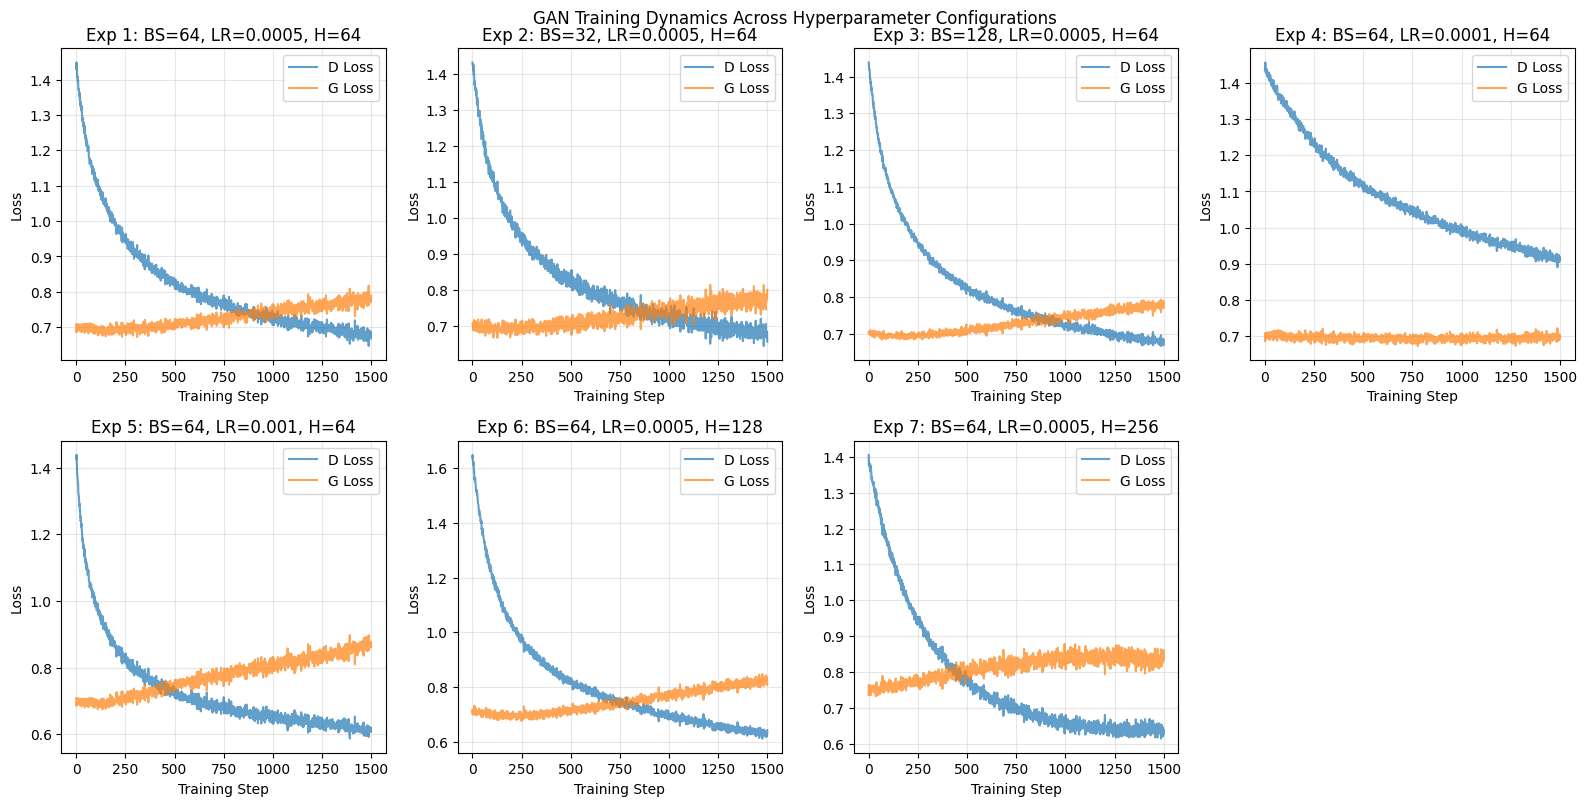

In [26]:

import pandas as pd
# Create summary table
summary_data = []
for i, result in enumerate(gan_results):
    hp = result['hyperparams']
    losses_d = result['losses_d']
    losses_g = result['losses_g']
    
    summary_data.append({
        'Exp': i+1,
        'Batch Size': hp['batch_size'],
        'LR_D': hp['learning_rate_d'],
        'LR_G': hp['learning_rate_g'],
        'Hidden Dim': hp['hidden_dim_g'],
        'Final Loss_D': losses_d[-1],
        'Final Loss_G': losses_g[-1],
        'Mean Loss_D': np.mean(losses_d),
        'Mean Loss_G': np.mean(losses_g),
        'Std Loss_D': np.std(losses_d),
        'Std Loss_G': np.std(losses_g),
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*100)
print("HYPERPARAMETER SENSITIVITY SUMMARY")
print("="*100)
print(summary_df.to_string(index=False))

# Visualize loss curves for all experiments
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, result in enumerate(gan_results):
    ax = axes[i]
    losses_d = result['losses_d']
    losses_g = result['losses_g']
    hp = result['hyperparams']
    
    ax.plot(losses_d, label='D Loss', alpha=0.7)
    ax.plot(losses_g, label='G Loss', alpha=0.7)
    ax.set_xlabel('Training Step')
    ax.set_ylabel('Loss')
    ax.set_title(f"Exp {i+1}: BS={hp['batch_size']}, LR={hp['learning_rate_d']}, H={hp['hidden_dim_g']}")
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide the last unused subplot
axes[-1].axis('off')

plt.tight_layout()
plt.suptitle("GAN Training Dynamics Across Hyperparameter Configurations", y=1.002)
plt.show()

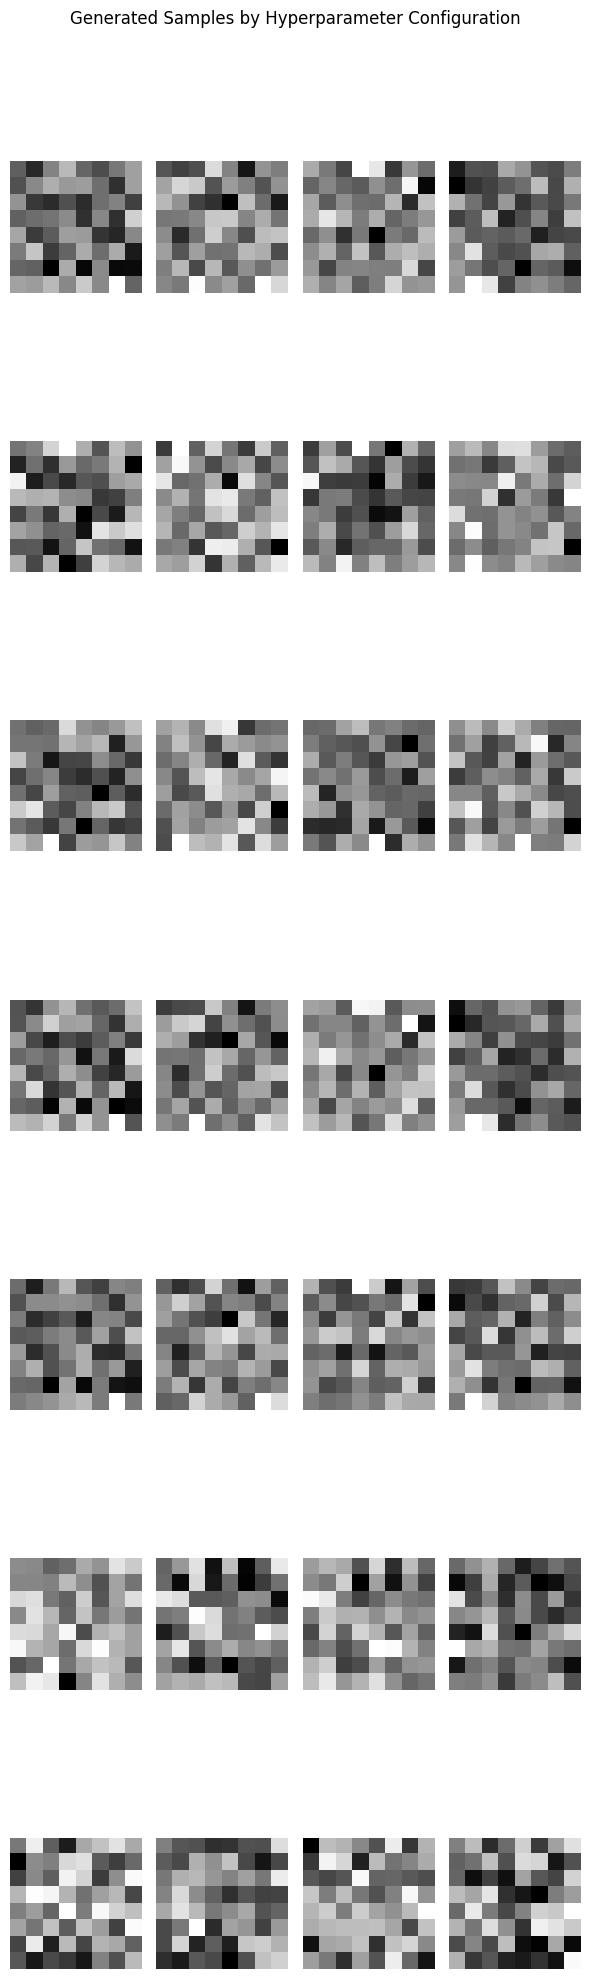

In [28]:
# Visualize generated samples for all experiments
fig, axes = plt.subplots(len(gan_results), 4, figsize=(6, 3*len(gan_results)))

for i, result in enumerate(gan_results):
    hp = result['hyperparams']
    fake_samples = result['fake_samples']
    
    # Show first 4 samples from each experiment
    for j in range(4):
        ax = axes[i, j] if len(gan_results) > 1 else axes[j]
        ax.imshow(fake_samples[j].reshape(8, 8), cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f"Exp {i+1}\nBS={hp['batch_size']}", fontsize=10)

plt.suptitle("Generated Samples by Hyperparameter Configuration", fontsize=12, y=0.995)
plt.tight_layout()
plt.show()